In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2025-09-20 16:51:34.824170: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-20 16:51:34.827663: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-20 16:51:34.838334: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758358294.856081  344351 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758358294.861215  344351 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-09-20 16:51:34.878898: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
tf.__version__

'2.18.0'

# Supervise Machine Learning

is a type of machine learning where an algorithm is trained using labeled data, meaning the input data comes with corresponding correct output labels. The algorithm learns to map inputs to outputs by finding patterns in the training data. Once trained, it can predict outputs for new, unseen data accurately. This process typically involves collecting labeled data, training a model with this data, testing the model's accuracy on unseen data, and then using the model for predictions.

- Linear Regression
- Logistic Regression
- Decision Trees
- Random Forests
- Support Vector Machine (SVM)

### Linear Regression

A supervised learning algorithm used to model the relationship between a dependent variable (output) and one or more independent variables (inputs) by fitting a linear equation to observed data points. The assumption is that the relationship between the input variables and the output is linear—that is, the output changes at a constant rate as the input changes.

**How Linear Regression Works:**
- The algorithm uses training data with known inputs and outputs.
- It fits a line by minimizing the sum of squared differences between the observed outputs and predicted values (ordinary least squares method).
- The model then can predict the output for new unseen inputs based on this fitted line.

**Usage in Machine Learning:**
- Predict continuous outcomes like house prices, stock prices, or exam scores based on features.
- Understand relationships between variables (e.g., effect of study hours on scores).
- Foundation for more complex models.
- Simple, interpretable, and computationally efficient.

**Example use case:**
- Predicting a student's exam score based on hours studied.

In [3]:
height = np.array([5, 5.2, 5.5, 6.2, 6.8])
weight = np.array([52, 55, 62, 68, 72])

Text(0, 0.5, 'Weight')

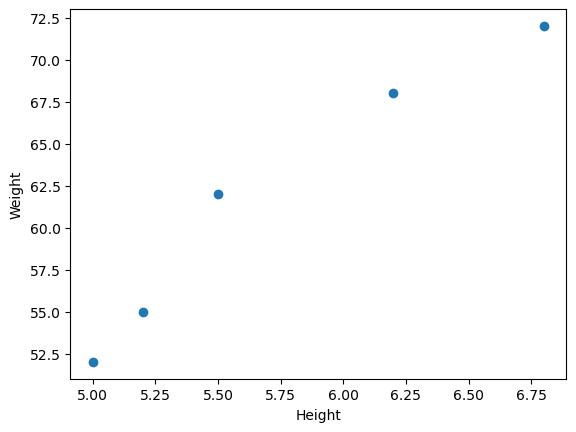

In [4]:
plt.scatter(height, weight)
plt.xlabel("Height")
plt.ylabel("Weight")

In [5]:
m, b = np.polyfit(height, weight, 1)

Text(0, 0.5, 'Weight')

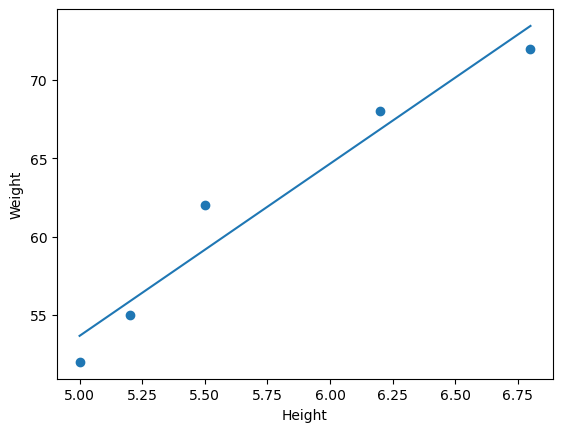

In [6]:
plt.scatter(height, weight)
plt.plot(height, m * height + b)
plt.xlabel("Height")
plt.ylabel("Weight")

In [7]:
new_height = 6.2
predicted_weight = m * new_height + b
print(f"Predicted Height: {predicted_weight}")

Predicted Height: 66.85752688172045


In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [9]:
data = pd.read_csv("data/car_purchasing_data.csv")
data.head()

,Customer Name,Customer e-mail,Country,gender,age,salary,debt,worth,amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [10]:
X = data[["gender", "age", "salary", "debt", "worth"]]
y = data["amount"]

In [11]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [12]:
to_predict_data = np.array([[0, 22, 55000, 0, 10000]])
print(f"Predicted Price: {model.predict(to_predict_data)}")

Predicted Price: [7596.91315183]


/home/xcql/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Logistic Regression

is a supervised learning algorithm used for classification problems, especially binary classification. predicts the probability of an input belonging to a particular class by modeling the relationship between independent variables and a binary dependent variable.

Logistic regression can also be extended to multinomial or ordinal logistic regression for cases with more than two classes or ordered classes.

Its simplicity, interpretability, and efficiency make logistic regression a foundational algorithm in classification tasks in machine learning.

**How it works:**
- Logistic regression uses the logistic (sigmoid) function to convert the linear combination of input features into a probability value between 0 and 1.
- The output probability represents the likelihood of the input belonging to the positive class (e.g., 1).
- A threshold (commonly 0.5) is applied to decide the predicted class — above the threshold means one class (1), below means the other class (0).

**Usage:**
- Predicting whether an email is spam or not.
- Diagnosing whether a patient has a disease (yes/no).
- Customer churn prediction (whether a customer will leave).
- Fraud detection in transactions.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv("data/heartdiseases_lite.csv")
data.head()

,Age,Gender,Education,Income,Smoker,Cholesterol,Heart_Disease
0,42,Female,Bachelor's Degree,65000,No,180,No
1,55,Male,High School Diploma,40000,Yes,245,Yes
2,30,Female,Master's Degree,80000,Yes,210,No
3,39,Male,Some College,50000,Yes,195,No
4,27,Male,Some College,30000,No,170,No


In [15]:
data = pd.get_dummies(data, columns=["Gender", "Education", "Smoker"], drop_first = True)
data.head()

,Age,Income,Cholesterol,Heart_Disease,Gender_Male,Education_Doctorate Degree,Education_High School Diploma,Education_Master's Degree,Education_Some College,Smoker_Yes
0,42,65000,180,No,False,False,False,False,False,False
1,55,40000,245,Yes,True,False,True,False,False,True
2,30,80000,210,No,False,False,False,True,False,True
3,39,50000,195,No,True,False,False,False,True,True
4,27,30000,170,No,True,False,False,False,True,False


In [16]:
X = data.drop("Heart_Disease", axis=1)
y = data["Heart_Disease"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [18]:
model = LogisticRegression()
model.fit(X_train, y_train)

/home/xcql/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
y_preds = model.predict(X_test)
y_preds

array(['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'No'], dtype=object)

In [20]:
accuracy_score(y_test, y_preds)

1.0

In [21]:
y_preds_proba = model.predict_proba(X_test)[:,1]
y_preds_proba

array([0.21494141, 0.06872062, 0.8327796 , 0.63329934, 0.57825411,
       0.23845979, 0.23845979, 0.75334069, 0.13811938, 0.15857231,
       0.65598708, 0.13599046, 0.59781995, 0.08029478, 0.40263061])

In [22]:
y_test = y_test.map({"Yes": 1, "No": 0})

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, y_preds_proba)
auc = roc_auc_score(y_test, y_preds_proba)

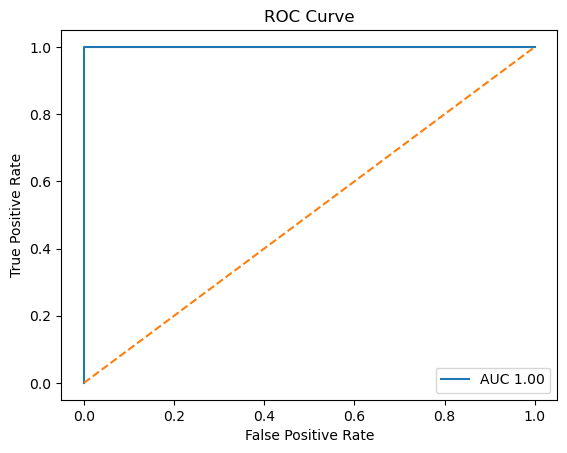

In [24]:
plt.plot(fpr, tpr, label=f"AUC {auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc = "lower right")

In [25]:
odds_ratios = np.exp(model.coef_)
odds_ratios

array([[1.28549212, 0.99996637, 0.96345121, 1.14317043, 1.58385926,
        1.96057811, 1.58581283, 0.46398878, 1.04525922]])

### Decision Tree

is a supervised machine learning algorithm that is used for both classification and regression tasks. It works by recursively splitting the dataset into subsets based on the most significant feature, making predictions by following a path of decisions (nodes) that lead to a leaf node. The tree-like structure of a Decision Tree resembles a flowchart, where each internal node represents a feature or decision rule, and each leaf node represents an outcome (prediction).

**Key Concepts:**
- **Root Node:** The topmost node, representing the entire dataset.
- **Decision Nodes:** Nodes where the dataset is split based on a feature's value.
- **Leaf Nodes:** Nodes that represent the final prediction (class or value).
- **Splitting:** The process of dividing the dataset into two or more subsets based on a feature.
- **Pruning:** Reducing the size of the tree by removing parts of the tree that don't provide significant improvements in prediction.

**How does it work?**
- The algorithm picks a feature and splits the data at a threshold value to maximize the homogeneity of the resulting subsets.
- The decision to split is usually made using a criterion like Gini Impurity or Entropy (for classification), and Mean Squared Error (for regression).
- The process continues recursively until the tree reaches a stopping condition (like a maximum depth or minimum samples in a leaf).

**Usage:**
- **Classification:** Predicting categories (e.g., spam vs. not spam, disease diagnosis).
- **Regression:** Predicting continuous values (e.g., house prices, temperature).
- Common applications include medical diagnosis, credit risk assessment, customer churn prediction, and more.

In [26]:
from sklearn.datasets import load_iris # Load the Iris dataset
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
import os
import graphviz

In [27]:
# load the iris dataset

data = load_iris()
X = data.data
y = data.target

Accuracy: 1.0


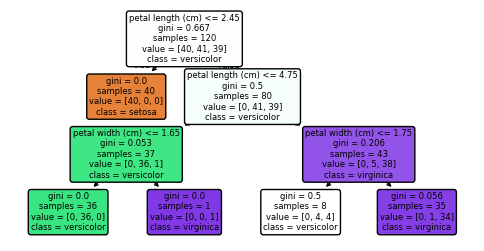

In [28]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# create a decision tree classifier
model = DecisionTreeClassifier(max_depth=3)

# train the model
model.fit(X_train, y_train)

# make a prediction
y_preds = model.predict(X_test)

# calculate the accuracy
accuracy = accuracy_score(y_test, y_preds)
print(f"Accuracy: {accuracy}")

# visualize the decision tree
plt.figure(figsize=(6, 3))
tree.plot_tree(model, filled = True, feature_names = data.feature_names, class_names = data.target_names, rounded = True)
plt.show()

### Random Forest

is an ensemble learning algorithm that combines the predictions of `multiple Decision Trees to improve the overall performance and reduce the risk of overfitting`. It is used for both classification and regression tasks. Instead of relying on a single decision tree, a Random Forest builds multiple decision trees and averages their predictions (for regression) or uses a majority vote (for classification) to make the final prediction.

**Key Concepts:**

- **Ensemble Learning:** Combining multiple models (in this case, decision trees) to produce a stronger overall model.
- **Bagging:** Random Forest uses a technique called bootstrap aggregating or bagging where multiple subsets of the training data are sampled with replacement to train each tree. This helps to reduce variance and improve generalization.
- **Random Feature Selection:** At each split in the tree, a random subset of features is considered, which reduces the correlation between the individual trees and increases diversity in the forest.

**How does work?**
- **Multiple Decision Trees:** Random Forest builds many decision trees, each trained on a random subset of the data.
- **Bootstrapping:** Each tree is trained on a random subset (with replacement) of the training data.
- **Random Feature Selection:** When splitting nodes, only a random subset of features is considered for each split (not all features).
- **Majority Voting (Classification):** For classification, the class that most trees predict is chosen as the final prediction.
- **Averaging (Regression):** For regression, the final prediction is the average of the predictions from all trees.

**Usage:**
- **Classification:** Spam detection, disease diagnosis, customer segmentation, fraud detection.
- **Regression:** Predicting house prices, stock prices, or energy consumption.
- Common in fields like finance, healthcare, and marketing for robust predictions.

In [29]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import load_breast_cancer

Accuracy: 0.9649122807017544


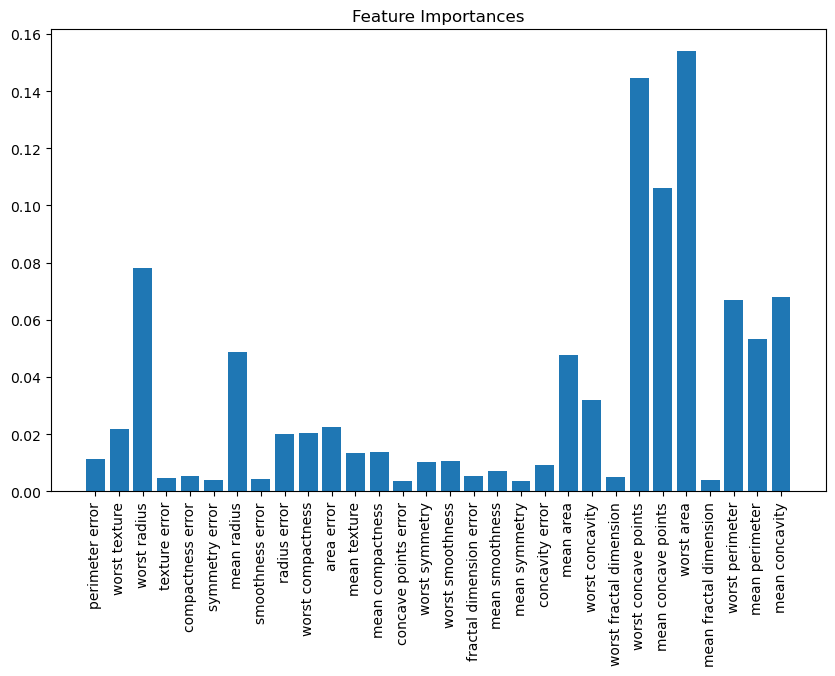

In [30]:
# load the data
data = load_breast_cancer()
X = data.data
y = data.target

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = RandomForestClassifier(n_estimators = 100, random_state = 42)

# train the model
model.fit(X_train, y_train)

# make a prediction
y_preds = model.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_preds)
print(f"Accuracy: {accuracy}")

# get feature importance
importances = model.feature_importances_

# sort feature importances indescneding order & rearrange features names do they match the sorted feature importances
indices = np.argsort(importances[::-1])
feature_names = data.feature_names[indices]

# create bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), feature_names, rotation = 90)
plt.show()

In [31]:
# Display feature importance
feature_importance = pd.DataFrame({
    'Feature': data.feature_names,
    'Importance': model.feature_importances_
})
print("\nFeature Importance:\n")
print(feature_importance.sort_values(by='Importance', ascending=False))


Feature Importance:

                    Feature  Importance
23               worst area    0.153892
27     worst concave points    0.144663
7       mean concave points    0.106210
20             worst radius    0.077987
6            mean concavity    0.068001
22          worst perimeter    0.067115
2            mean perimeter    0.053270
0               mean radius    0.048703
3                 mean area    0.047555
26          worst concavity    0.031802
13               area error    0.022407
21            worst texture    0.021749
25        worst compactness    0.020266
10             radius error    0.020139
5          mean compactness    0.013944
1              mean texture    0.013591
12          perimeter error    0.011303
24         worst smoothness    0.010644
28           worst symmetry    0.010120
16          concavity error    0.009386
4           mean smoothness    0.007285
19  fractal dimension error    0.005321
15        compactness error    0.005253
29  worst fractal 

### Support Vector Machine (SVM)

is a supervised machine learning algorithm used for classification and regression tasks. It is particularly known for its robustness in `high-dimensional spaces and its ability to handle both linear and non-linear decision boundaries`. The key idea behind SVM is to find a `hyperplane` that best separates different classes in the feature space.

**Key Concepts:**
- **Hyperplane:** A hyperplane is a decision boundary that separates data points belonging to different classes. In 2D, it is a line; in 3D, it is a plane; and in higher dimensions, it becomes a hyperplane.
- **Support Vectors:** These are the data points that are closest to the hyperplane. These points define the margin and are crucial in determining the optimal hyperplane.
- **Margin:** The margin is the distance between the hyperplane and the closest data point from either class (support vectors). SVM aims to maximize this margin, as a larger margin typically leads to better generalization.
- **Kernel Trick:** When the data is not linearly separable, SVM uses a technique called the kernel trick to map the data to a higher-dimensional space where a linear hyperplane can be used to separate the classes. Common kernels include:
    - **Linear kernel:** For linearly separable data.
    - **Polynomial kernel:** For non-linear data with polynomial relationships.
    - **RBF (Radial Basis Function) kernel:** For data that is not linearly separable in higher dimensions.
- **C Parameter:** This parameter controls the trade-off between maximizing the margin and minimizing classification error. A large value of C means the model will try to classify all points correctly (low bias, high variance), while a smaller value of C will allow some misclassification for the sake of a wider margin (high bias, low variance).

**How does it Works:**
- **Training:** SVM tries to find the optimal hyperplane that maximizes the margin between the two classes. It focuses on the support vectors to define this hyperplane.
- **Classification:** Once the hyperplane is determined, new data points are classified based on which side of the hyperplane they fall on.

**Usage:**
- **Classification:** Text classification (e.g., spam detection), image classification, bioinformatics (e.g., protein classification), and sentiment analysis.
- **Regression:** Support Vector Regression (SVR) for predicting continuous values like stock prices or temperature.
Common in applications requiring high accuracy on small to medium-sized datasets, such as medical diagnosis or fault detection.

In [32]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [33]:
# load the data
data = load_breast_cancer()
X = data.data
y = data.target

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale the features (important for SVM)
scaler = StandardScaler() # Features are standardized with StandardScaler to ensure equal weighting, as hierarchical clustering is sensitive to feature scales.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scalled = scaler.fit_transform(X_test)

# initialize the model
model = SVC(kernel="linear", C=1.0, random_state=42)

# train the model
model.fit(X_train_scaled, y_train)

# make a prediction
y_preds = model.predict(X_test_scalled)

# calculate accuracy
accuracy = accuracy_score(y_test, y_preds)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9736842105263158


# Unsupervised Learning

is a type of machine learning where the model is trained on data without labeled outputs or explicit instructions on what to predict. The goal is to identify patterns, structures, or relationships within the data itself, without predefined categories or target variables.

**Key Concepts:**
- **No Labeled Data:** Unlike supervised learning, where data includes input-output pairs (e.g., images labeled as "cat" or "dog"), unsupervised learning works with raw, unlabeled data. The model must find inherent structures or groupings.
Main Tasks:
- **Clustering:** Grouping similar data points together based on their features. For example, grouping customers with similar purchasing behaviors for market segmentation.
    - Common algorithms: K-means clustering, hierarchical clustering, DBSCAN.
- **Dimensionality Reduction:** Reducing the number of features in a dataset while preserving important information. This is useful for visualization or simplifying complex data.
    - Common algorithms: Principal Component Analysis (PCA), t-SNE, autoencoders.
- **Anomaly Detection:** Identifying unusual or rare data points, often used for fraud detection or system monitoring.
Association: Finding rules or relationships between items, like discovering that people who buy bread often buy butter (market basket analysis).
    - Common algorithm: Apriori.
 
**How It Works:**
- The model analyzes the data’s features to identify patterns or similarities.
- For example, in clustering, it might group data points based on proximity in a feature space, using metrics like Euclidean distance.
- Algorithms optimize objective functions, like minimizing within-cluster variance in K-means or maximizing data compression in PCA.

**Real-World Applications:**
- **Customer Segmentation:** Identifying groups of customers with similar purchasing behavior to target marketing campaigns.
- **Anomaly Detection:** Spotting unusual patterns in financial transactions to identify potential fraud.
- **Document Clustering:** Grouping similar documents based on their content, such as news articles or scientific papers.
- **Recommendation Systems:** For instance, movie or product recommendations can be based on user similarities, even without explicit ratings (though this often combines supervised and unsupervised techniques).

### K-means Clustering

is a popular unsupervised machine learning algorithm `used to partition a dataset into K distinct, non-overlapping clusters`. It `groups data points based on their similarity`, where similarity is typically measured by the distance (e.g., Euclidean) between data points in a feature space. The algorithm iteratively assigns points to clusters and optimizes the cluster centers (centroids) to minimize the variance within each cluster.

**Key Characteristics:**
- **K:** The number of clusters must be specified beforehand.
- **Objective:** Minimize the within-cluster sum of squares (WCSS), which measures the variance within each cluster.
- **Assumptions:** Assumes clusters are spherical and of similar size, and data points are closer to their own cluster’s centroid than others.

**How It Works:**
1. **Initialization:** Randomly select K initial centroids (cluster centers) from the data or use a method like K-means++ for smarter initialization.
2. **Assignment:** Assign each data point to the nearest centroid based on a distance metric (usually Euclidean distance).
3. **Update:** Recalculate the centroid of each cluster as the mean of all points assigned to it.
4. **Iteration:** Repeat the assignment and update steps until the centroids stabilize (i.e., no significant changes in assignments) or a maximum number of iterations is reached.
5. **Output:** The final clusters and their centroids, with each data point assigned to one cluster.

**Real-World Applications:**
K-means is widely used in various domains for tasks like:

- **Customer Segmentation:** Grouping customers by purchasing behavior for targeted marketing (e.g., identifying high-spending vs. budget-conscious shoppers).
- **Image Segmentation:** Dividing an image into regions based on pixel similarity (e.g., separating foreground from background).
- **Document Clustering:** Organizing articles or texts by topic similarity.
- **Anomaly Detection:** Identifying outliers by assigning points far from any centroid as anomalies.
- **Market Basket Analysis:** Grouping products frequently bought together.

In [34]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

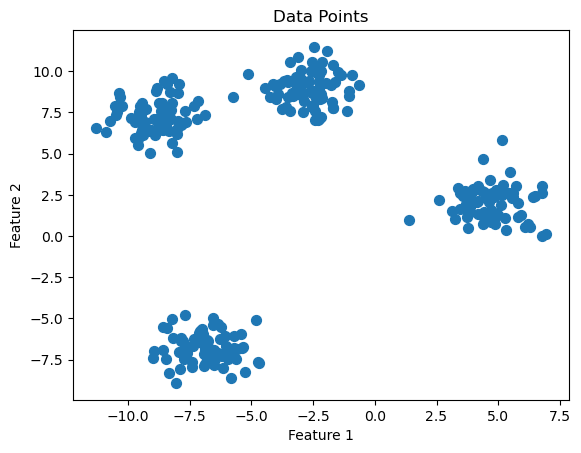

In [35]:
# generate random data points
X, _ = make_blobs(n_samples = 300, centers = 4, random_state = 42)

# plot the data points
plt.scatter(X[:, 0], X[:, 1], s = 50)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Data Points")
plt.show()

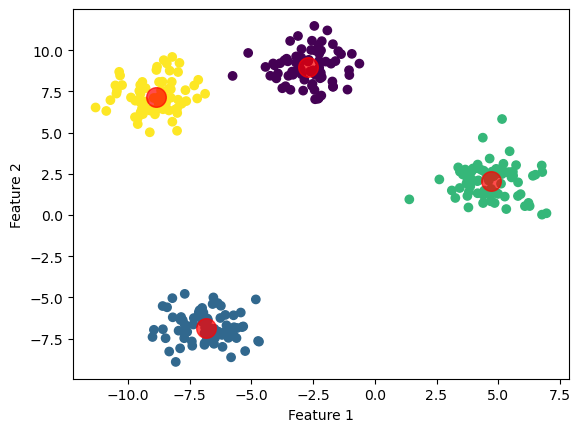

In [36]:
# create a k-mmeans object with k=4 clusters
model = KMeans(n_clusters = 4, random_state = 42)

# train the model
model.fit(X)

# get the cluster labels assigend to each data points
labels = model.labels_

# get the cluster centers
centers = model.cluster_centers_

# plot the data points with cluster
plt.scatter(X[:, 0], X[:, 1], c = labels, cmap = "viridis")

# plot the cluster centers
plt.scatter(centers[:, 0], centers[:, 1], marker = "o", c = "red", s = 200, alpha = 0.7)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [37]:
_d, _ = make_blobs(n_samples=3, centers=4, random_state=42)
_d[:, 0]

array([-0.92998481, -7.34304488,  4.17040445])

### Hierachical Clustering

is an unsupervised machine learning algorithm used to `group similar data points into clusters based on their distances or similarities`. Unlike other clustering methods like K-means, which require specifying the number of clusters beforehand, hierarchical clustering builds a hierarchy of clusters either by merging smaller clusters (agglomerative) or splitting larger clusters (divisive). The result is often visualized as a tree-like structure called a `dendrogram`, which shows the relationships between clusters at different levels of granularity.

**Key Concepts:**
- **Agglomerative (Bottom-Up):**
    - Starts with each data point as its own cluster.
    - Iteratively merges the closest pair of clusters based on a distance metric (e.g., Euclidean distance) and a linkage criterion (e.g., single, complete, average, or ward linkage).
    - Continues until all points are in a single cluster or a stopping criterion is met.
- **Divisive (Top-Down):**
    - Starts with all data points in one cluster.
    - Recursively splits clusters into smaller ones based on dissimilarity.
    - Less common than agglomerative due to higher computational complexity.
- **Distance Metrics:**
    - Common metrics include Euclidean distance, Manhattan distance, or cosine similarity, which measure how "far apart" data points are.
- **Linkage Criteria:**
    - Single linkage: Distance between the closest points in two clusters.
    - Complete linkage: Distance between the farthest points in two clusters.
    - Average linkage: Average distance between all pairs of points in two clusters.
    - Ward’s method: Minimizes the increase in within-cluster variance after merging.
- **Dendrogram:**
    - A tree diagram that shows the order of cluster mergers or splits.
    - Helps determine the optimal number of clusters by "cutting" the tree at a desired level.

**How It Works:**
1. **Initialize:** Start with each point as a separate cluster.
2. **Calculate Pairwise Distances:** Compute the distance between each pair of clusters (using distance measures like Euclidean distance).
3. **Merge Closest Clusters:** Find the two clusters that are closest to each other and merge them.
4. **Repeat:** Continue merging the closest clusters until all points belong to a single cluster or until a stopping criterion (such as a desired number of clusters) is met.
5. **Dendrogram:** A dendrogram is created during this process to visualize the merging of clusters.

**Real-World Applications:**
- **Gene Expression Analysis:** Grouping genes with similar expression patterns (e.g., in biology or genomics).
- **Document Clustering:** Grouping similar documents together for information retrieval or content analysis.
- **Customer Segmentation:** Identifying groups of customers with similar behaviors or preferences.

In [38]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage

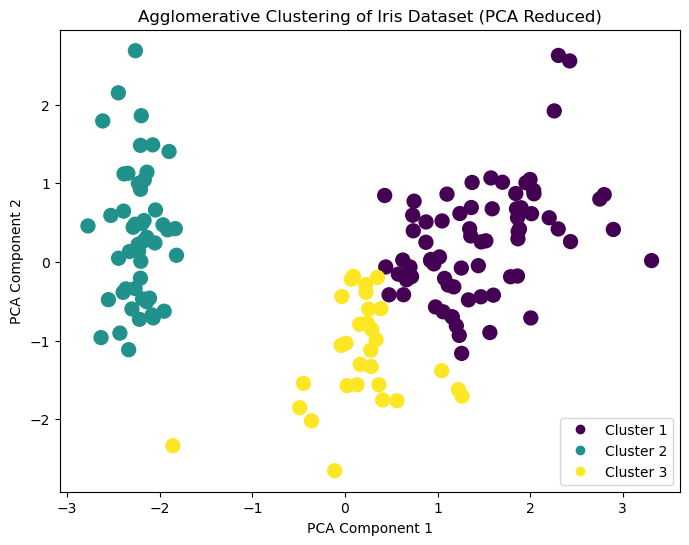

Adjusted Rand Index (ARI): 0.615


In [43]:
np.random.seed(0)

# Load the Iris dataset
data = load_iris()
X = data.data  # Features: sepal length, sepal width, petal length, petal width
y = data.target  # True labels (for evaluation)

# standardize the features
scaler = StandardScaler() # Features are standardized with StandardScaler to ensure equal weighting, as hierarchical clustering is sensitive to feature scales
X_scaled = scaler.fit_transform(X)

# apply AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3, linkage="ward", metric="euclidean")
clusters = clustering.fit_predict(X_scaled)

# reduce dimensions to 2D for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# plot the clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c = clusters, cmap = "viridis", s = 100)
plt.title("Agglomerative Clustering of Iris Dataset (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(handles = scatter.legend_elements()[0], labels = ["Cluster 1", "Cluster 2", "Cluster 3"])
plt.show()

# evaluate clustering using Adjusted Rand Index
ari = adjusted_rand_score(y, clusters)
print(f"Adjusted Rand Index (ARI): {ari:.3f}")

### Principal Component Analysis (PCA)

to `transform a high-dimensional dataset into a lower-dimensional space while preserving as much of the data's variance (information)` as possible. It achieves this by finding new axes, called `principal components`, which are linear combinations of the original features. These components are ordered by the amount of variance they explain, with the first principal component capturing the most variance.
PCA is widely used in unsupervised learning for tasks like data visualization, noise reduction, and improving computational efficiency by reducing the number of features.

**Key Concepts:**
1. **Variance and Principal Components:**
    - PCA identifies directions (principal components) in the feature space where the data varies the most.
    - Each principal component is orthogonal (uncorrelated) to the others, ensuring they capture distinct patterns.
2. **Dimensionality Reduction:**
    - Instead of using all original features, PCA projects the data onto a smaller number of principal components (e.g., reducing from 10 features to 2).
    - This reduces computational complexity and can help mitigate the curse of dimensionality.
3. **Steps of PCA:**
    - **Standardize the Data:** Scale features to have zero mean and unit variance, as PCA is sensitive to feature scales.
    - **Compute the Covariance Matrix:** Measures how features vary together.
    - **Eigenvalue Decomposition:** Find the eigenvectors (principal components) and eigenvalues (amount of variance explained) of the covariance matrix.
    - **Select Top Components:** Choose the top k eigenvectors based on their eigenvalues to form a new feature space.
    - **Project the Data:** Transform the original data onto the new axes (principal components).
4. **Explained Variance Ratio:**
    - Each principal component has an associated eigenvalue that indicates the proportion of the dataset’s total variance it explains.
    - For example, if the first two components explain 95% of the variance, reducing to 2D retains most of the data’s information.

**Intuitive Explanation:**

Imagine a dataset with two features (e.g., height and weight of people) plotted as a 2D scatter plot. The data points might form an elongated cloud. PCA finds the direction of the longest spread (first principal component) and a perpendicular direction (second principal component). Instead of using height and weight, you can describe the data using these new axes, which may capture most of the variation in fewer dimensions.

For higher-dimensional data (e.g., 100 features), PCA finds the top k directions that explain the most variance, allowing you to reduce the data to k dimensions while losing minimal information.

**How It Works:**
1. **Standardization** (optional but recommended):
    - Before applying PCA, the data is often standardized (mean = 0, standard deviation = 1) so that all features have equal weight. This is especially important when the features have different units or scales (e.g., height in cm, weight in kg).
2. **Compute the Covariance Matrix:**
    - PCA starts by calculating the covariance matrix of the data. This matrix represents how much the features vary together. Features with high covariance are more likely to be correlated.
3. **Eigenvalues and Eigenvectors:**
    - The covariance matrix is decomposed into eigenvalues and eigenvectors. Eigenvectors represent the direction of the new axes (principal components), and the eigenvalues represent the magnitude or importance of each principal component.
4. **Sort Eigenvectors:**
    - The eigenvectors are sorted in decreasing order of their corresponding eigenvalues. The eigenvectors with the highest eigenvalues represent the principal components that capture the most variance in the data.
5. **Projection onto Principal Components:**
    - The original data is projected onto the top `k` principal components (usually chosen based on the cumulative explained variance). This transforms the data into a lower-dimensional space.
  
**Real-World Applications:**
- **Image Compression:** In computer vision, PCA can reduce the dimensionality of images while preserving important features, making storage and processing more efficient.
- **Speech Recognition:** PCA is used to reduce the dimensionality of audio features, helping to focus on the most important features for recognition tasks.
- **Gene Expression Analysis:** In bioinformatics, PCA helps to visualize gene expression data, identifying patterns of variation between genes.
- **Customer Segmentation:** In marketing, PCA can be used to reduce the number of variables (such as age, income, and spending behavior) when analyzing customer data.

In [45]:
from sklearn.datasets import load_wine

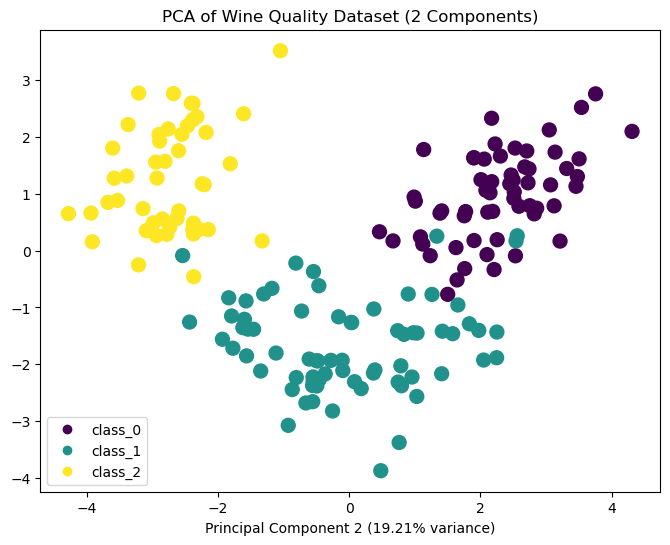

Explained Variance Ration: [0.36198848 0.1920749 ]
Total Variance Explained: 55.41%


In [78]:
# load dataset
data = load_wine()
X = data.data # Features: 13 chemical properties (we'll treat as 11 for simplicity)
y = data.target # Target: wine class (0, 1, 2)

# standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# apply PCA to reduce to 2 dimensions
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

# plot the 2D projection
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y, cmap = "viridis", s = 100)
plt.title("PCA of Wine Quality Dataset (2 Components)")
plt.xlabel(f"Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)")
plt.xlabel(f"Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)")
plt.legend(handles = scatter.legend_elements()[0], labels = data.target_names.tolist())
plt.show()

# print the explained variance ration
print(f"Explained Variance Ration: {pca.explained_variance_ratio_}")
print(f"Total Variance Explained: {pca.explained_variance_ratio_.sum():.2%}")